In [452]:
%run init.py # notebook initialization
%run retrieve-data.ipynb # donwload and format DPC Covid data
ita = pd.read_pickle('dataframes/mydata_dpc_ita.p') # national and regional dataframes
prov = pd.read_pickle('dataframes/mydata_dpc_ita_province.p') # province dataframe

ita['date'] = ita['date'] - timedelta(hours=17)
prov['date'] = prov['date'] - timedelta(hours=17)

lastday = ita.date.iat[-1]
print('Dati regionali aggiornati a:', lastday)
print('Dati provinciali aggiornati a:', prov.date.iat[-1])

lockdown_date = pd.Timestamp(datetime.datetime(2020,3,11))
phase2_date = pd.Timestamp(datetime.datetime(2020,5,4))
bmk_p2 = ita[ita.date==phase2_date]

# WEEKLY DATA!!!
ita_weekly = ita.groupby(['region','weekid'],as_index=False).sum()
ita_weekly['date'] = ita_weekly['weekid'].map(lambda weekid: datetime.datetime.strptime('%04d-%02d-1' % (int(weekid/100), weekid-int(weekid/100)*100), '%G-%V-%w').date()+timedelta(days=6))


#############################################
# Useful functions
#############################################
def sorted_set(regions, var):
    '''Ordina set rispetto alla variabile var'''
    df = data[data.region.isin(regions)][data.date==lastday].sort_values(var, ascending=False)
    sortedset = df.region.unique()
    return sortedset

def leglabels_style():
    '''Make legend labels colored'''
    leg._legend_box.align = "left"
    for line, text in zip(leg.get_lines(), leg.get_texts()):
        text.set_color(line.get_color())
        
def format_dateaxis():
    ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%-d %b %y'))
    fig.autofmt_xdate()
    plt.gcf().autofmt_xdate()
    
def sorted_set_prov(df, province, var):
    '''Ordina set rispetto alla variabile var'''
    df = df[df.provincia.isin(province)][df.date==lastday].sort_values(var, ascending=False)
    sortedset = df.provincia.unique()
    return sortedset

Current time: 2020-05-19 18:39:17.623729


/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


Dati regionali aggiornati a: 2020-05-19 00:00:00
Dati provinciali aggiornati a: 2020-05-19 00:00:00


In [453]:
summary = ita[ita.date==lastday].sort_values('new_cases', ascending=False)
summary = summary[['region','new_cases','cases','cases_per100k']]
summary = summary.reset_index(drop=True)
summary.head(30)

,region,new_cases,cases,cases_per100k
0,Italia,813,226699,374.722154
1,Nord,748,182099,656.023489
2,Lombardia,462,85481,851.404382
3,Piemonte,108,29727,678.698630
4,Liguria,66,9257,593.397436
5,Veneto,47,18997,386.904277
6,Emilia-Romagna,47,27314,613.797753
7,Sud,34,15406,80.842148
8,Centro,31,29194,213.359643
9,Lazio,20,7505,127.203390


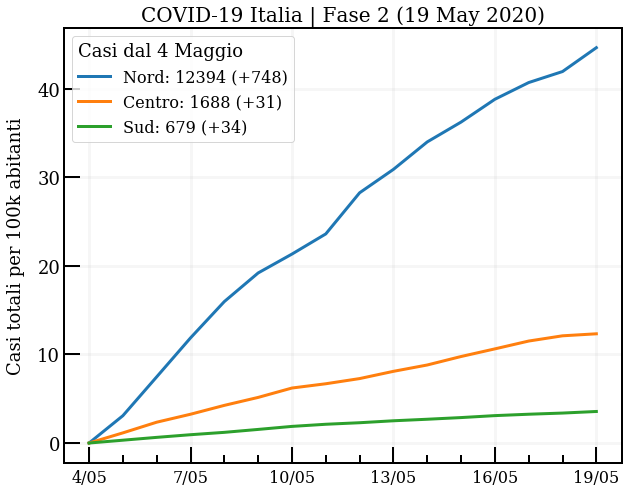

In [468]:
regions = ['Nord', 'Centro', 'Sud']
colors = ['tab:blue', "tab:orange","tab:green"]
var = 'cases_per100k'

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

regions = ['Nord', 'Centro', 'Sud']
colors = ['tab:blue', "tab:orange","tab:green"]
N = len(regions)

data = ita[ita.date>=phase2_date]

for i,reg in enumerate(regions):
    df = data[data.region==reg]
    values = df[var]-df[var].iat[0]
    tot = (df['cases']-df['cases'].iat[0]).iat[-1]
    new = df['new_cases'].iat[-1]
    lb = '%s: %d (+%.f)' % (reg ,tot, new)
    ax.plot(df.date, values, label=lb)


plt.ylabel('Casi totali per 100k abitanti')
plt.grid(axis='x', linewidth=3, alpha=0.1, which='major')
plt.grid(axis='y', linewidth=3, alpha=0.1, which='both')
ax.tick_params(axis='x', which='major', labelsize=16)

ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%-d/%m'))
#fig.autofmt_xdate()
#plt.gcf().autofmt_xdate()

#legend
leg = plt.legend(loc='upper left',fontsize=16, title='Casi dal 4 Maggio') 
leg._legend_box.align = "left"

plt.title('COVID-19 Italia | Fase 2 (%s)' % lastday.strftime('%-d %b %Y'), fontsize=20)

plt.show()

    
#cumulative(regions, colors, 'cases_per100k', title='COVID-19 Casi (Totale assoluto)', ylabel='Casi totali')
#cumulative(regions, colors, 'deaths', title='COVID-19 Morti (Totale assoluto)', ylabel='Morti totali')
#cumulative(regions, colors, 'recovered', title='COVID-19 Guariti (Totale assoluto)', ylabel='Guariti totali')
#cumulative(regions, colors, 'tests', title='COVID-19 Tamponi (Totale assoluto)', ylabel='Tamponi totali')

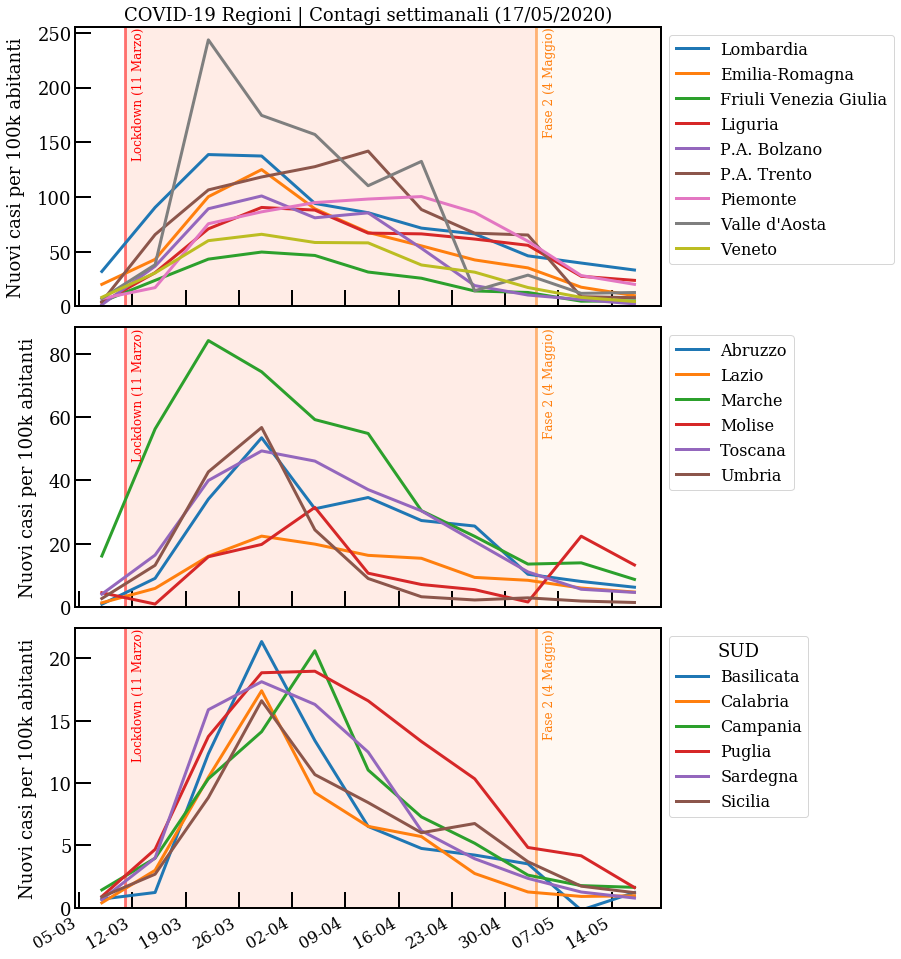

In [469]:
# figure
fig = plt.figure(figsize=(14,18))
grid = plt.GridSpec(3, 4, hspace=0.075, wspace=0)
ax = fig.add_subplot(grid[0, 1:])
ax2 = fig.add_subplot(grid[1, 1:], sharex=ax)
ax3 = fig.add_subplot(grid[2:, 1:], sharex=ax)
ax.tick_params(labelbottom=False) 
ax2.tick_params(labelbottom=False) 


   
for reg in nord:
    df=ita_weekly[ita_weekly.region==reg]
    ax.plot(df.date[1:-1],df.new_cases_per100k[1:-1], label=reg)
    ax.legend(loc='upper left', bbox_to_anchor=(1.,1.), title='NORD')
    
for reg in centro:
    df=ita_weekly[ita_weekly.region==reg]
    ax2.plot(df.date[1:-1],df.new_cases_per100k[1:-1], label=reg)
    ax2.legend(loc='upper left', bbox_to_anchor=(1.,1.), title='CENTRO')
    
for reg in sud:
    df=ita_weekly[ita_weekly.region==reg]
    ax3.plot(df.date[1:-1],df.new_cases_per100k[1:-1], label=reg)
    ax3.legend(loc='upper left', bbox_to_anchor=(1.,1.), title='SUD')

for axx in [ax,ax2,ax3]:
    axx.autoscale(False) 
    axx.vlines(datetime.date(2020,3,11),-1000,10000, color='r', linestyles='-', alpha=0.5)
    axx.vlines(datetime.date(2020,5,4),-1000,10000, color='tab:orange', linestyles='-', alpha=0.5)
    axx.axvspan(datetime.date(2020,3,11),datetime.date(2020,5,4),-1000,10000, color='r', alpha=0.05)
    axx.axvspan(datetime.date(2020,3,11),datetime.date(2021,5,4),-1000,10000, color='tab:orange', alpha=0.05)
    axx.text(datetime.date(2020,3,12), axx.get_ylim()[1], 'Lockdown (11 Marzo)', va='top', ha='left', rotation=90, fontsize=12, color='r')
    axx.text(datetime.date(2020,5,5), axx.get_ylim()[1], 'Fase 2 (4 Maggio)', va='top', ha='left', rotation=90, fontsize=12, color='tab:orange')
    axx.set_ylabel('Nuovi casi per 100k abitanti')
    axx.set_ylim(bottom=0)


ax3.tick_params(axis='x', which='major', labelsize=16)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
ax.tick_params(axis='x', which='major', labelsize=14)
fig.autofmt_xdate()
plt.gcf().autofmt_xdate()

ax.set_title('COVID-19 Regioni | Contagi settimanali (%s)' % df.date.iat[-2].strftime('%-d/%m/%Y'))

plt.show()

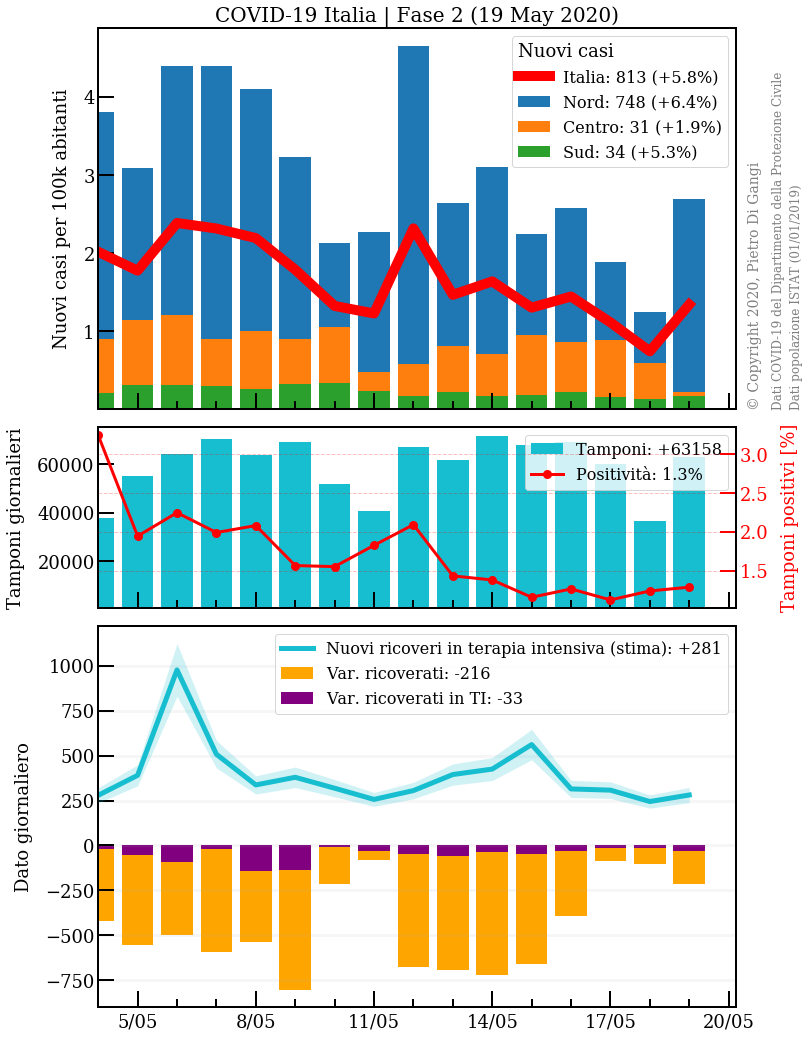

In [467]:
regions = ['Nord', 'Centro', 'Sud','Italia']
var = 'new_cases'
cumvar = var.replace("new_", "")
title = 'COVID-19 Italia | Fase 2 (%s)' % lastday.strftime('%-d %b %Y') 
ylabel = 'Nuovi casi per 100k abitanti'

    

# figure
fig = plt.figure(figsize=(18,18))
grid = plt.GridSpec(5, 3, hspace=0.1, wspace=0.35)
ax = fig.add_subplot(grid[:-3, 1:])
#y_ax = fig.add_subplot(grid[:-1, 0])#, xticks=[])#, sharey=ax)
x_ax = fig.add_subplot(grid[-3, 1:], sharex=ax)
x_ax2 = fig.add_subplot(grid[-2:, 1:], sharex=ax)
#x_ax.tick_params(axis='y', which='major', labelsize=14)
#ax.tick_params(left=False, labelleft=False, right=True, labelright=True) 
ax.tick_params(labelbottom=False) 
x_ax.tick_params(labelbottom=False) 

data = ita[ita.date>=phase2_date]

# main panel plot data
for i,reg in enumerate(regions):
    df = data[data.region==reg]
    pop = df['population'].iat[0]        
    tot = df[var].iat[-1]
    cumtot = df[cumvar].iat[-2] - df[cumvar].iat[0]
    lb = '%s: %.f (+%.1f%s)' % (reg, tot, tot/cumtot*100, '%')
    if reg=='Italia':
        ax.plot(df.date, df[var]/pop*1e5, label=lb, color='r', lw=10, ls='-')
    else:
        ax.bar(df.date, df[var]/pop*1e5, label=lb)
        
ax.set_ylabel(ylabel)
#ax.yaxis.set_label_position("right")

leg = ax.legend(loc=0, title='Nuovi casi') 
leg._legend_box.align = "left"


# bottom panel
ax2 = x_ax.twinx()
ax2.set_ylabel('Tamponi positivi [%]', color='r')
ax2.tick_params(colors='r')
#ax2.set_yticks(np.arange(0,55,1))
#ax2.set_ylim(0)
ax2.grid(axis='y', linewidth=1, alpha=0.25, color='r', ls='--', which='both')
x_ax.set_ylabel('Tamponi giornalieri')
var = 'new_tests'
cumvar = var.replace("new_", "")
tot = df[var].iat[-1]
lb1 = 'Tamponi: +%d' % (df[var].iat[-1])
b1 = x_ax.bar(df.date, df[var], label=lb1, color='tab:cyan')

lb3 = 'Positività: %.1f%s' % (df['new_cases'].iat[-1]/df['new_tests'].iat[-1]*100, '%')
l, = ax2.plot(df.date, df['new_cases']/df['new_tests']*100, label=lb3, color='r', marker='.', lw=3)

handles = [b1, l]
labels = [lb1, lb3]
x_ax.legend(handles, labels, loc=0)
x_ax.set_ylim(500)

# left panel
x_ax2.grid(axis='y', linewidth=3, alpha=0.1, which='major')

if df.new_ricoverati_con_sintomi.iat[-1]<0: sign=''
else: sign='+'
x_ax2.bar(df.date, df.new_ricoverati_con_sintomi, color='orange', label='Var. ricoverati: %s%d' % (sign,df.new_ricoverati_con_sintomi.iat[-1]))

if df.new_terapia_intensiva.iat[-1]<0: sign=''
else: sign='+'
x_ax2.bar(df.date, df.new_terapia_intensiva, color='purple', label='Var. ricoverati in TI: %s%d' % (sign,df.new_terapia_intensiva.iat[-1]))

x_ax2.plot(df.date, df.new_terapia_intensiva_netta, color='tab:cyan', lw=5, label='Nuovi ricoveri in terapia intensiva (stima): +%d' % df.new_terapia_intensiva_netta.iat[-1])
x_ax2.fill_between(df.date, df.new_terapia_intensiva_netta*1.15, df.new_terapia_intensiva_netta, lw=0, alpha=0.2, color='tab:cyan', zorder=100)
x_ax2.fill_between(df.date, df.new_terapia_intensiva_netta*0.85, df.new_terapia_intensiva_netta, lw=0, alpha=0.2, color='tab:cyan', zorder=100)

x_ax2.legend(loc=0)

x_ax2.set_ylabel('Dato giornaliero')
#y_ax.tick_params(axis='y', which='major', labelsize=16)
#y_ax.yaxis.set_minor_locator(mdates.DayLocator(interval=1))
#y_ax.yaxis.set_major_locator(mdates.DayLocator(interval=3))
#y_ax.yaxis.set_major_formatter(mdates.DateFormatter('%-d/%m'))
#y_ax.legend()


# axes settings
ax.set_xlim(left = phase2_date)
ax.set_ylim(bottom = 0.01)
#plt.ylabel(ylabel)
#plt.grid(axis='x', linewidth=3, alpha=0.1, which='major')
#plt.grid(axis='y', linewidth=3, alpha=0.1, which='both')
ax.tick_params(axis='x', which='major', labelsize=16)
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%-d/%m'))

#legend

ax.set_title(title , fontsize=20)

# disclaimer
dayspan = df.date.iat[-1] - phase2_date
text = '© Copyright 2020, Pietro Di Gangi'
ax.text(lastday+0.10*dayspan, 0, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=14)
text = 'Dati COVID-19 del Dipartimento della Protezione Civile'
ax.text(lastday+0.14*dayspan, 0, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=12)
text = 'Dati popolazione ISTAT (01/01/2019)'
ax.text(lastday+0.17*dayspan, 0, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=12)

plt.show()



In [457]:
def overview(regions):
    var = 'new_cases'
    cumvar = var.replace("new_", "")
    title = 'COVID-19 ' +regions[0]+ ' | Fase 2 (%s)' % lastday.strftime('%-d %b %Y') 
    ylabel = 'Nuovi casi per 100k abitanti'



    # figure
    fig = plt.figure(figsize=(18,18))
    grid = plt.GridSpec(5, 3, hspace=0.1, wspace=0.35)
    ax = fig.add_subplot(grid[:-3, 1:])
    #y_ax = fig.add_subplot(grid[:-1, 0])#, xticks=[])#, sharey=ax)
    x_ax = fig.add_subplot(grid[-3, 1:], sharex=ax)
    x_ax2 = fig.add_subplot(grid[-2, 1:], sharex=ax)
    x_ax3 = fig.add_subplot(grid[-1, 1:], sharex=ax)
    #x_ax.tick_params(axis='y', which='major', labelsize=14)
    ax.tick_params(labelbottom=False) 
    x_ax.tick_params(labelbottom=False) 
    x_ax2.tick_params(labelbottom=False) 

    data = ita[ita.date>=phase2_date]

    # main panel plot data
    for i,reg in enumerate(regions):
        df = data[data.region==reg]
        pop = df['population'].iat[0]        
        tot = df[var].iat[-1]
        cumtot = df[cumvar].iat[-2] - df[cumvar].iat[0]
        lb = '%s: %.f (+%.1f%s)' % (reg, tot, tot/cumtot*100, '%')
        if reg=='Italia':
            ax.plot(df.date, df[var]/pop*1e5, label=lb, color='r', lw=3, ls='--')
        else:
            ax.bar(df.date, df[var]/pop*1e5, label=lb, color='tab:blue')

    ax.set_ylabel(ylabel)
    #ax.yaxis.set_label_position("right")

    leg = ax.legend(loc=0, title='Nuovi casi') 
    leg._legend_box.align = "left"


    df = data[data.region==regions[0]]
    
    # bottom panel
    ax2 = x_ax.twinx()
    ax2.set_ylabel('Tamponi positivi [%]', color='r')
    ax2.tick_params(colors='r')
    #ax2.set_yticks(np.arange(0,55,1))
    #ax2.set_ylim(0)
    ax2.grid(axis='y', linewidth=1, alpha=0.25, color='r', ls='--', which='both')
    x_ax.set_ylabel('Tamponi')
    var = 'new_tests'
    cumvar = var.replace("new_", "")
    tot = df[var].iat[-1]
    lb1 = 'Tamponi: +%d' % (df[var].iat[-1])
    b1 = x_ax.bar(df.date, df[var], label=lb1, color='mediumseagreen')

    lb3 = 'Positività: %.1f%s' % (df['new_cases'].iat[-1]/df['new_tests'].iat[-1]*100, '%')
    l, = ax2.plot(df.date, df['new_cases']/df['new_tests']*100, label=lb3, color='r', marker='.', lw=3)

    handles = [b1, l]
    labels = [lb1, lb3]
    x_ax.legend(handles, labels, loc=0)
    #x_ax.set_ylim(500)

    
    
    # bottom panel 2
    x_ax2.grid(axis='y', linewidth=3, alpha=0.1, which='major')
    
    x_ax2.plot(df.date, df.new_terapia_intensiva_netta, color='tab:cyan', lw=5, label='Nuovi ricoveri in terapia intensiva (stima): +%d' % df.new_terapia_intensiva_netta.iat[-1])
    x_ax2.fill_between(df.date, df.new_terapia_intensiva_netta*1.1, df.new_terapia_intensiva_netta, lw=0, alpha=0.2, color='tab:cyan', zorder=100)
    x_ax2.fill_between(df.date, df.new_terapia_intensiva_netta*0.9, df.new_terapia_intensiva_netta, lw=0, alpha=0.2, color='tab:cyan', zorder=100)
    x_ax2.legend(loc=0)
    x_ax2.set_ylabel('Ingressi in\nTerapia Intensiva')
    #x_ax2.set_ylim(bottom=0.5)
    
    
    # bottom panel 3
    x_ax3.grid(axis='y', linewidth=3, alpha=0.1, which='major')

    if df.new_ricoverati_con_sintomi.iat[-1]<0: sign=''
    else: sign='+'
    x_ax3.bar(df.date, df.new_ricoverati_con_sintomi, color='tab:orange', label='Ricoverati: %s%d' % (sign,df.new_ricoverati_con_sintomi.iat[-1]))

    if df.new_terapia_intensiva.iat[-1]<0: sign=''
    else: sign='+'
    x_ax3.bar(df.date, df.new_terapia_intensiva, color='purple', label='Ricoverati in terapia intensiva: %s%d' % (sign,df.new_terapia_intensiva.iat[-1]))
    
    x_ax3.legend(loc=0)
    x_ax3.set_ylabel('Variazione\nRicoverati')


    # axes settings
    ax.set_xlim(left = phase2_date)
    #ax.set_ylim(bottom = 0.1)
    #plt.ylabel(ylabel)
    #plt.grid(axis='x', linewidth=3, alpha=0.1, which='major')
    #plt.grid(axis='y', linewidth=3, alpha=0.1, which='both')
    ax.tick_params(axis='x', which='major', labelsize=16)
    ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%-d/%m'))

    #legend

    ax.set_title(title , fontsize=20)

    # disclaimer
    dayspan = df.date.iat[-1] - phase2_date
    text = '© Copyright 2020, Pietro Di Gangi'
    ax.text(lastday+0.10*dayspan, 0, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=14)
    text = 'Dati COVID-19 del Dipartimento della Protezione Civile'
    ax.text(lastday+0.14*dayspan, 0, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=12)
    text = 'Dati popolazione ISTAT (01/01/2019)'
    ax.text(lastday+0.17*dayspan, 0, text, rotation=90, verticalalignment='bottom', color='grey', fontsize=12)

    plt.show()

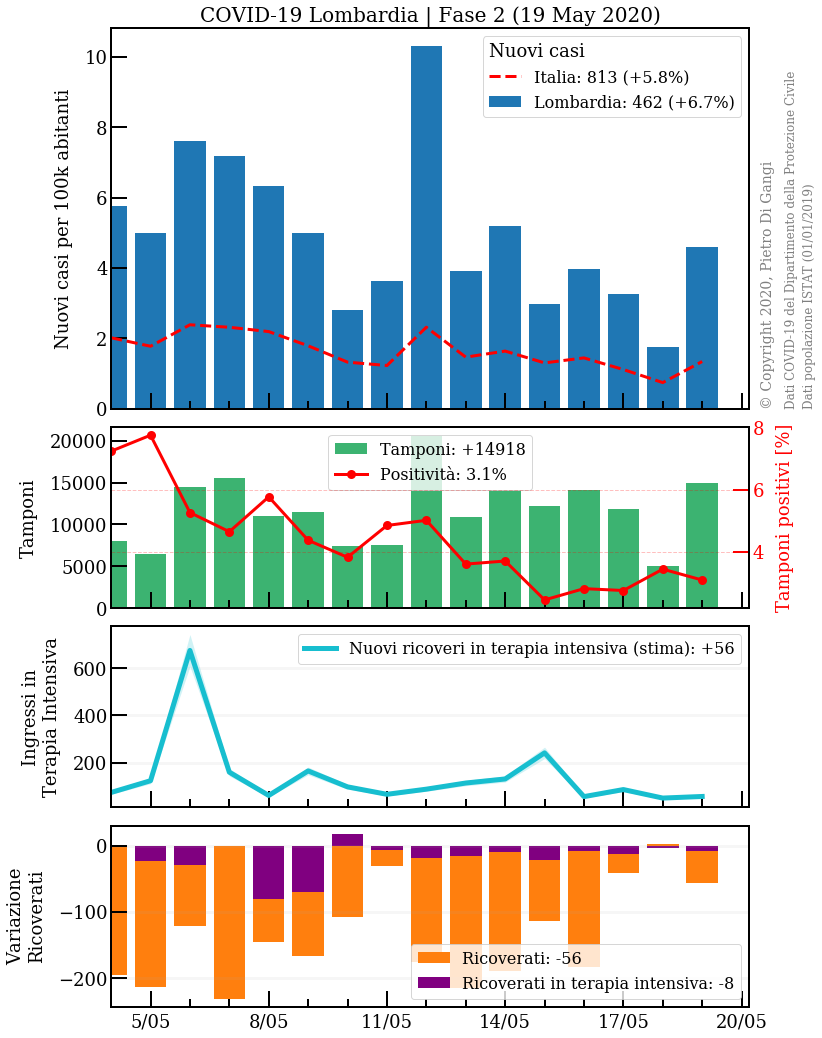

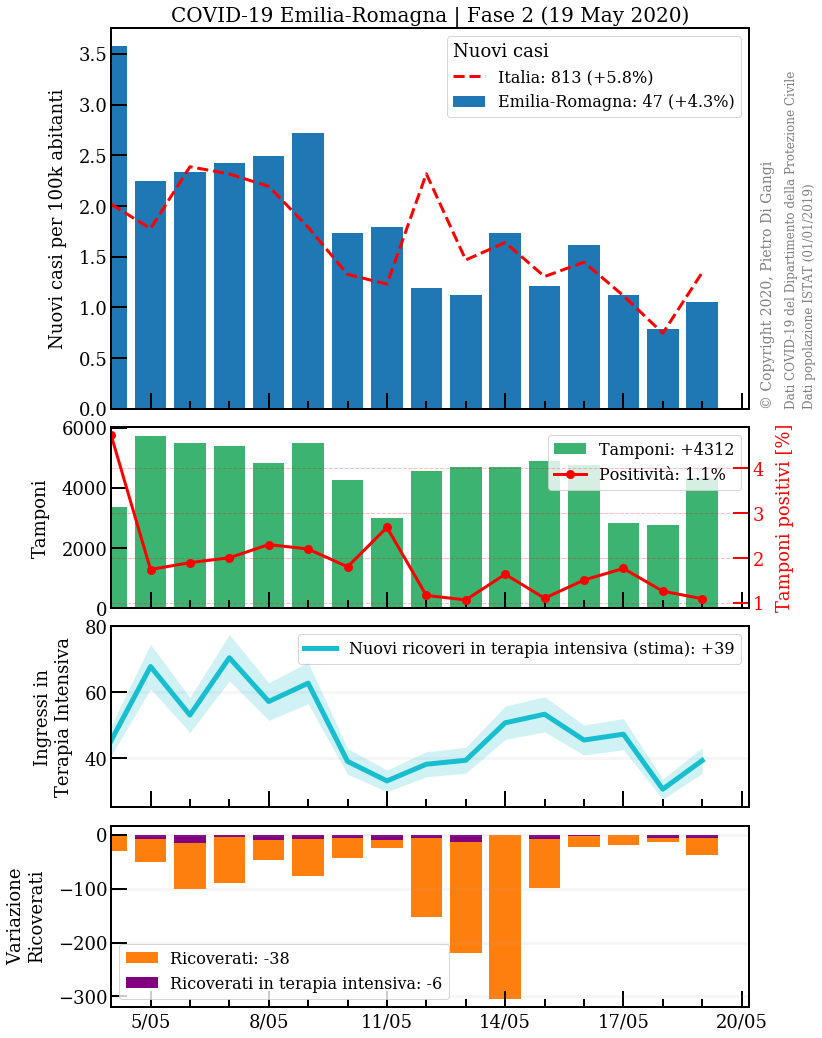

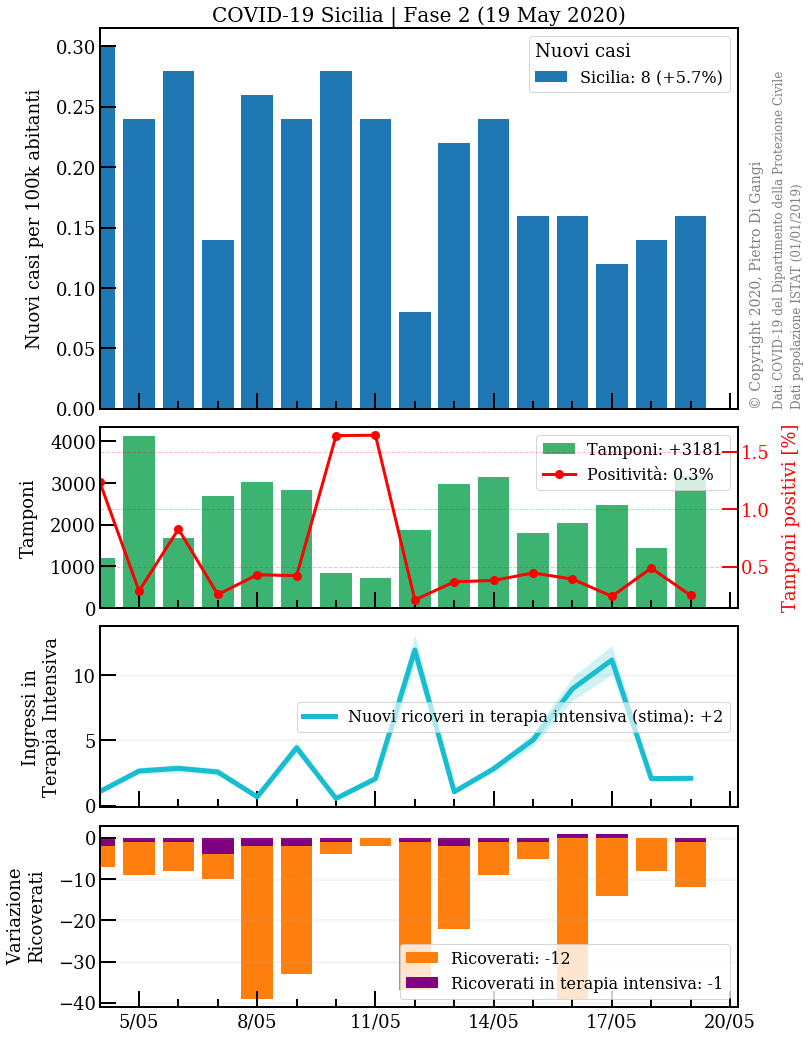

In [458]:
overview(['Lombardia', 'Italia'])
overview(['Emilia-Romagna', 'Italia'])
overview(['Sicilia'])

In [459]:
datetime.date(2020, 5,22).isocalendar()[1]

21

In [460]:
datetime.date(2020, 5,22).year

2020

In [461]:
ita['weekid'] = ita['date'].map(lambda date: (date.isocalendar()[1], date.year))


In [462]:
ita['weekid']

0        (9, 2020)
1        (9, 2020)
2        (9, 2020)
3        (9, 2020)
4        (9, 2020)
5        (9, 2020)
6        (9, 2020)
7       (10, 2020)
8       (10, 2020)
9       (10, 2020)
10      (10, 2020)
11      (10, 2020)
12      (10, 2020)
13      (10, 2020)
14      (11, 2020)
15      (11, 2020)
16      (11, 2020)
17      (11, 2020)
18      (11, 2020)
19      (11, 2020)
20      (11, 2020)
21      (12, 2020)
22      (12, 2020)
23      (12, 2020)
24      (12, 2020)
25      (12, 2020)
26      (12, 2020)
27      (12, 2020)
28      (13, 2020)
29      (13, 2020)
           ...    
2120    (17, 2020)
2121    (17, 2020)
2122    (17, 2020)
2123    (17, 2020)
2124    (17, 2020)
2125    (17, 2020)
2126    (17, 2020)
2127    (18, 2020)
2128    (18, 2020)
2129    (18, 2020)
2130    (18, 2020)
2131    (18, 2020)
2132    (18, 2020)
2133    (18, 2020)
2134    (19, 2020)
2135    (19, 2020)
2136    (19, 2020)
2137    (19, 2020)
2138    (19, 2020)
2139    (19, 2020)
2140    (19, 2020)
2141    (20,